In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

In [2]:
import scanpy 
scanpy.__version__

'1.10.1'

In [3]:
data = sc.read("../../data/merged_raw_SamplesAnnotated.h5ad")

In [13]:
data[data.obs.Disease=="Sample"].obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan,x_centroid,y_centroid,cell_area,Slide_ID,batch,Patient_Sample_ID,Disease,n_genes
cell_CRfb095a77d-136380,6722.879694,6671.638471,24.513864,1,17,2.2160,1.526,7.670,0.9956,0.9788,0.529412,50,6722.879694,6671.638471,7.670,0011695,0,Not_In_Sample,Sample,13
cell_CRfb095a77d-145693,7355.748688,6508.885124,24.595723,3,17,2.4030,1.063,7.074,0.9978,0.9835,0.764706,50,7355.748688,6508.885124,7.074,0011695,0,Not_In_Sample,Sample,12
cell_CRfb095a77d-159748,8631.741288,6592.379621,25.220554,4,33,1.6030,2.119,20.580,0.9971,0.9873,1.000000,50,8631.741288,6592.379621,20.580,0011695,0,Not_In_Sample,Sample,16
cell_CRfb095a77d-247683,8374.665911,11224.561357,22.526954,1,28,1.7070,3.450,16.400,0.9968,0.9850,0.857143,50,8374.665911,11224.561357,16.400,0011695,0,Not_In_Sample,Sample,26
cell_CR4113b3b6d-136487,7349.500200,4758.687358,29.676149,3,128,0.8366,5.167,153.000,0.9957,0.9770,0.984375,50,7349.500200,4758.687358,153.000,0018775,0,Not_In_Sample,Sample,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-571593,2748.897675,5716.005017,21.951952,4,36,0.6624,1.544,54.350,0.9954,0.8078,0.944444,50,2748.897675,5716.005017,54.350,0011216,1,Not_In_Sample,Sample,8
cell_CRc71d71060-572073,2761.642400,5743.687000,28.386707,3,13,3.7780,11.520,3.441,0.9976,0.8785,1.000000,50,2761.642400,5743.687000,3.441,0011216,1,Not_In_Sample,Sample,6
cell_CRc71d71060-574395,2716.647747,5715.962900,21.151748,2,19,1.8500,6.125,10.270,0.9976,0.8779,1.000000,50,2716.647747,5715.962900,10.270,0011216,1,Not_In_Sample,Sample,8
cell_CRc71d71060-578266,2777.814265,5704.131350,24.989063,4,66,1.5890,4.097,41.530,0.9948,0.6045,1.000000,50,2777.814265,5704.131350,41.530,0011216,1,Not_In_Sample,Sample,10


In [4]:
data.layers["counts"] = data.X.copy()

In [7]:
data.obs["Disease"] = [e.split("_")[-1] for e in data.obs["Patient_Sample_ID"]]

In [8]:
print(data.shape)

(4195109, 480)


In [9]:
sc.pp.filter_cells(data, min_genes=5)

In [10]:
sc.pp.normalize_total(data, inplace=True)
sc.pp.log1p(data)

In [3]:
sc.tl.pca(data)

In [4]:
sc.external.pp.harmony_integrate(data, key="Slide_ID", max_iter_harmony=50)

2024-08-06 08:16:57,863 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-08-06 08:23:53,314 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-08-06 08:24:28,738 - harmonypy - INFO - Iteration 1 of 50
2024-08-06 08:59:00,268 - harmonypy - INFO - Iteration 2 of 50
2024-08-06 09:28:42,218 - harmonypy - INFO - Iteration 3 of 50
2024-08-06 10:00:07,460 - harmonypy - INFO - Iteration 4 of 50
2024-08-06 10:29:59,708 - harmonypy - INFO - Iteration 5 of 50
2024-08-06 10:38:15,995 - harmonypy - INFO - Converged after 5 iterations


In [5]:
sc.pp.neighbors(data, use_rep="X_pca_harmony")
sc.tl.umap(data)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/conda/envs/xenium_cgn/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


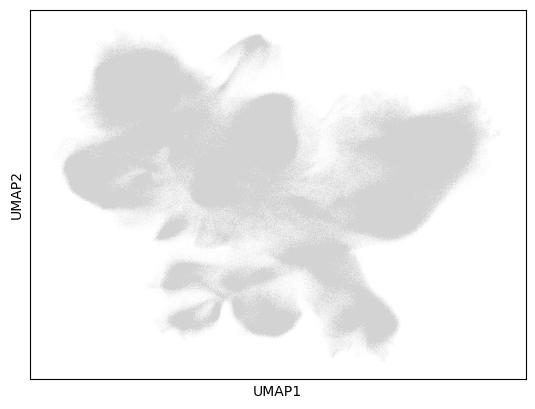

In [6]:
sc.pl.umap(data)

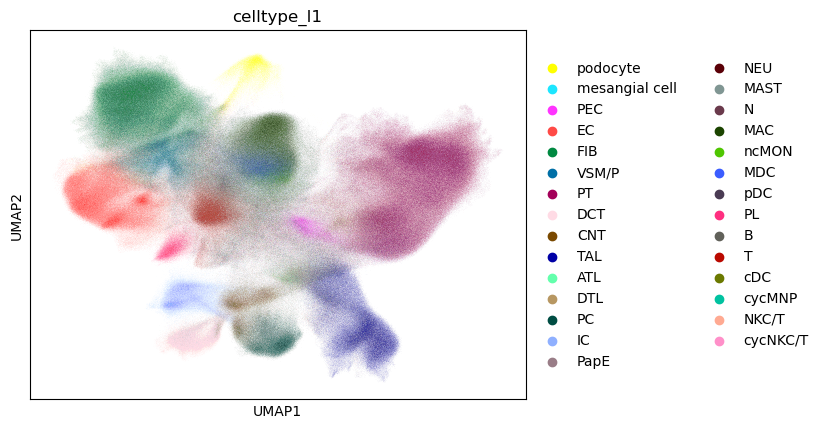

In [9]:
sc.pl.umap(data, color="celltype_l1")

In [ ]:
data.write("../../data/xenium_outs/merged_processed_integrated.h5ad")